Square asymetric noise

In [2]:
import functools
import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.spatial.distance import cdist
import torch
import torch.nn.functional as F
from torch import optim
import networkx as nx
import pickle

from symfac.experimental import RBFExpansionV2

100%|██████████| 10000/10000 [01:18<00:00, 127.14it/s]


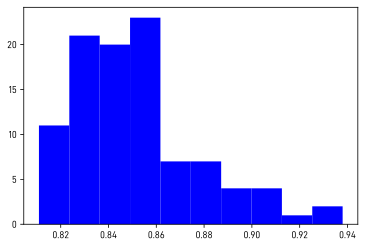

0.8108883


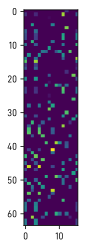

100%|██████████| 10000/10000 [01:21<00:00, 123.39it/s]


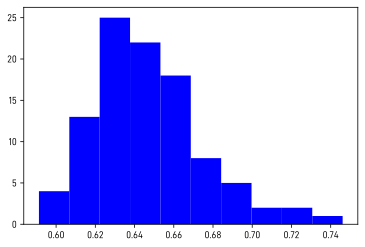

0.5912539


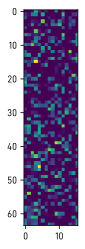

100%|██████████| 10000/10000 [01:22<00:00, 120.72it/s]


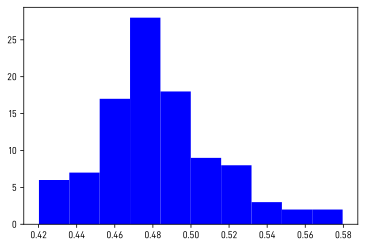

0.420191


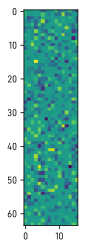

100%|██████████| 10000/10000 [01:27<00:00, 114.32it/s]


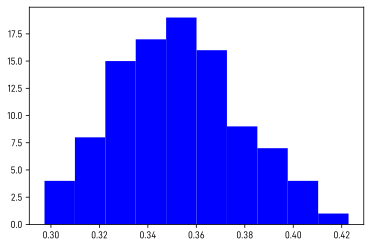

0.297352


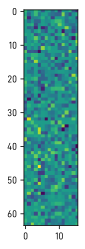

100%|██████████| 10000/10000 [01:30<00:00, 110.18it/s]


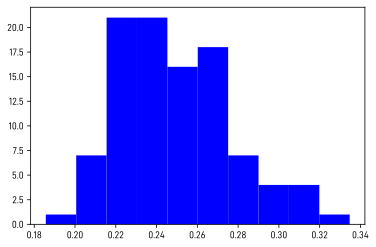

0.1856855


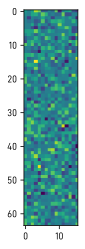

100%|██████████| 10000/10000 [01:34<00:00, 105.36it/s]


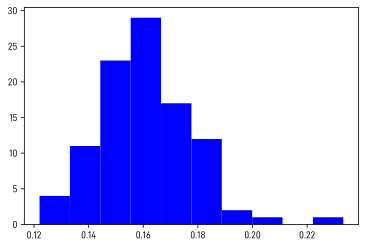

0.1220262


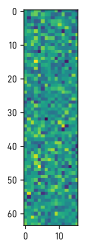

100%|██████████| 10000/10000 [01:35<00:00, 104.58it/s]


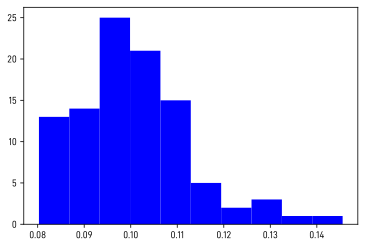

0.0802693


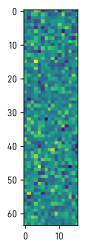

100%|██████████| 10000/10000 [01:41<00:00, 98.99it/s]


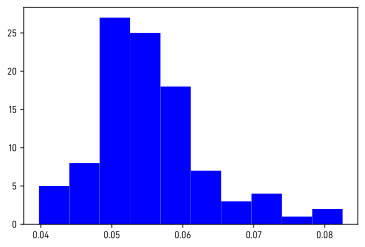

0.0397324


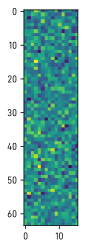

100%|██████████| 10000/10000 [01:44<00:00, 95.96it/s]


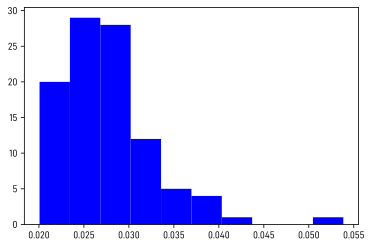

0.0200679


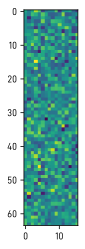

[0.8108883, 0.5912539, 0.420191, 0.297352, 0.1856855, 0.1220262, 0.0802693, 0.0397324, 0.0200679]


In [8]:
n = 64
m = 16
batch_size = 100
errors = []
target = torch.normal(0.0, 1.0, (n, m))

for k in range(1,10):
    u0=1/1000*torch.randn([batch_size, target.shape[0], k], device="cuda") 
    v0=1/1000*torch.randn([batch_size, target.shape[1], k], device="cuda") 

    a=torch.randn([batch_size, k], device="cuda")
    b=torch.randn([batch_size], device="cuda")
    fac = RBFExpansionV2(k=k, batch_size=batch_size, max_steps=10000)
    fac.fit(
        target,
        u0=u0,
        v0=v0,
        a0=a,
        b0=b
    )
    plt.hist(fac.report.loss_best, color='b', label='1')
    plt.show()

    plt.show()
    error = fac.report.loss_best
    er = round(float(torch.min(error).cpu().detach().numpy()), 7)
    print(er)
    errors.append(er)
    plt.imshow(fac.optimum(runs=torch.argmin(fac.report.loss_best)))
    plt.show()
    open('rect_gaus_noise_{0}.pickle'.format(k), 'wb').write(pickle.dumps(fac.optimum.x))
print(errors)

In [6]:
s_vals = []
U0, S0, V0 = np.linalg.svd(target.detach().numpy())
for s in range(1, target.shape[1]+1):
    s_vals.append(round(float(F.mse_loss(torch.tensor((U0[:, :s] * S0[None, :s]) @ V0[:s, :]), target)),7))

In [7]:
s_vals

[0.850467,
 0.7409359,
 0.64702,
 0.5591471,
 0.4827248,
 0.4143233,
 0.3494553,
 0.2894922,
 0.2341641,
 0.181004,
 0.1344489,
 0.0962488,
 0.0689778,
 0.0428485,
 0.0199156,
 0.0]

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


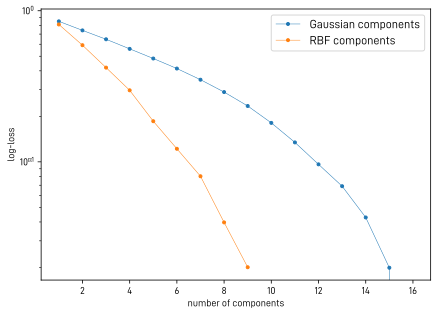

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(range(1, len(s_vals)+1), s_vals, '.-', label='Gaussian components')
plt.plot(range(1, len(errs)+1), errs, '.-',label='RBF components')
plt.ylabel('log-loss')
plt.yscale('log')
plt.xlabel('number of components')
plt.legend(loc='upper right', fontsize=12)
#plt.title('Graph kernel 256*256')
plt.show()

In [12]:
open('rgn_losses.pickle', 'wb').write(pickle.dumps([errors, s_vals]))

249

In [13]:
errs, s_vals = pickle.load(open("rgn_losses.pickle", "rb"))